# Tek_Degiskenli_Analiz

In [94]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns
from scipy.stats.mstats import winsorize
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format= '{:.3f}'.format

In [95]:
df= pd.read_csv('states_all_1.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,nan,2678885.000,304177.000,1659028.000,715680.000,2653798.000,1481703.000,...,57948.000,58025.000,41167.000,nan,nan,731634.000,208.328,252.188,207.964,nan
1,1992_ALASKA,ALASKA,1992,nan,1049591.000,106780.000,720711.000,222100.000,972488.000,498362.000,...,9748.000,8789.000,6714.000,nan,nan,122487.000,nan,nan,nan,258.860
2,1992_ARIZONA,ARIZONA,1992,nan,3258079.000,297888.000,1369815.000,1590376.000,3401580.000,1435908.000,...,55433.000,49081.000,37410.000,nan,nan,673477.000,215.254,265.366,206.213,262.170
3,1992_ARKANSAS,ARKANSAS,1992,nan,1711959.000,178571.000,958785.000,574603.000,1743022.000,964323.000,...,34632.000,36011.000,27651.000,nan,nan,441490.000,210.206,256.312,208.634,264.620
4,1992_CALIFORNIA,CALIFORNIA,1992,nan,26260025.000,2072470.000,16546514.000,7641041.000,27138832.000,14358922.000,...,418418.000,363296.000,270675.000,nan,nan,5254844.000,208.399,260.892,196.764,nan


In [96]:
df.isnull().sum()*100/df.isnull().count()

PRIMARY_KEY                     0.000
STATE                           0.000
YEAR                            0.000
ENROLL                         36.184
TOTAL_REVENUE                  33.525
FEDERAL_REVENUE                33.525
STATE_REVENUE                  33.525
LOCAL_REVENUE                  33.525
TOTAL_EXPENDITURE              33.525
INSTRUCTION_EXPENDITURE        33.525
SUPPORT_SERVICES_EXPENDITURE   33.525
OTHER_EXPENDITURE              36.184
CAPITAL_OUTLAY_EXPENDITURE     33.525
GRADES_PK_G                    19.604
GRADES_KG_G                    14.911
GRADES_4_G                     14.911
GRADES_8_G                     14.911
GRADES_12_G                    14.911
GRADES_1_8_G                   46.820
GRADES_9_12_G                  44.161
GRADES_ALL_G                   14.911
AVG_MATH_4_SCORE               72.106
AVG_MATH_8_SCORE               72.315
AVG_READING_4_SCORE            72.263
AVG_READING_8_SCORE            74.088
dtype: float64

In [97]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [98]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

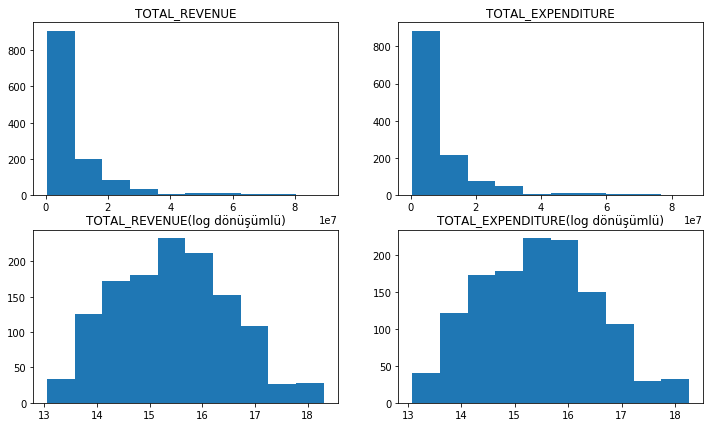

In [99]:
plt.figure(figsize=(12,7))
listem=["TOTAL_REVENUE","TOTAL_EXPENDITURE"]
for i in range(2):
    plt.subplot(2,2,i+1)
    plt.hist(df[listem[i]])
    plt.title(listem[i])
for i in range(2):
    plt.subplot(2,2,i+3)
    plt.hist(np.log(df[listem[i]]))
    plt.title(listem[i]+'(log dönüşümlü)')

In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,1918.000,2001.947,9.061,1986.000,1994.000,2002.000,2010.000,2017.000
ENROLL,1224.000,917541.566,1066514.199,43866.000,264514.500,649933.500,1010532.000,6307022.000
TOTAL_REVENUE,1275.000,9102044.929,11759620.228,465650.000,2189503.500,5085826.000,10845163.000,89217262.000
FEDERAL_REVENUE,1275.000,767779.864,1146991.507,31020.000,189957.500,403548.000,827932.000,9990221.000
STATE_REVENUE,1275.000,4223742.903,5549734.818,0.000,1165776.000,2537754.000,5055547.500,50904567.000
LOCAL_REVENUE,1275.000,4110522.156,5489561.973,22093.000,715121.000,2058996.000,4755293.000,36105265.000
TOTAL_EXPENDITURE,1275.000,9206242.122,11992791.012,481665.000,2170404.000,5242672.000,10744201.500,85320133.000
INSTRUCTION_EXPENDITURE,1275.000,4768010.485,6300569.340,265549.000,1171336.500,2658253.000,5561959.000,43964520.000
SUPPORT_SERVICES_EXPENDITURE,1275.000,2682586.519,3357214.499,139963.000,638076.000,1525471.000,3222924.500,26058021.000
OTHER_EXPENDITURE,1224.000,429950.934,534789.311,11541.000,103449.250,271704.000,517222.250,3995951.000


In [101]:
states = df['STATE'].unique()
for state in states:
    df.loc[df['STATE']== state,fill_list]=df.loc[df['STATE']== state,fill_list].interpolate()

In [102]:
x= df[df.STATE=="CALIFORNIA"]["YEAR"]

In [103]:
y= df[df.STATE=="CALIFORNIA"]["TOTAL_EXPENDITURE"]

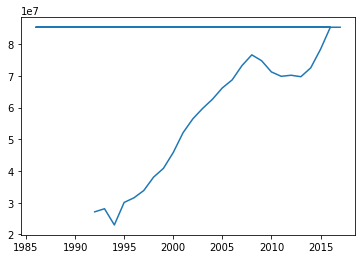

In [104]:
plt.plot(x,y)
plt.show()

In [105]:
for col in fill_list:
    df[col] = df.groupby('STATE')[col].transform(lambda x: x.interpolate())

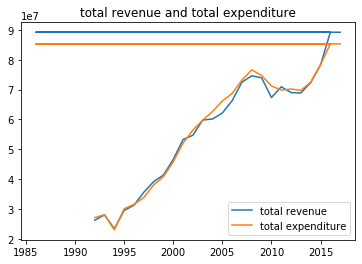

In [106]:
plt.plot(df.loc[df['STATE']=="CALIFORNIA","YEAR"], df.loc[df['STATE']=="CALIFORNIA","TOTAL_REVENUE"],label="total revenue")
plt.plot(df.loc[df['STATE']== "CALIFORNIA","YEAR"], df.loc[df['STATE']=="CALIFORNIA","TOTAL_EXPENDITURE"],label="total expenditure")
plt.title("total revenue and total expenditure")
plt.legend()
plt.show()

In [108]:
df["FARK_4"] = df.AVG_READING_4_SCORE - df.AVG_MATH_4_SCORE
df["FARK_8"] = df.AVG_READING_8_SCORE - df.AVG_MATH_8_SCORE

In [109]:
x = df[df.STATE == "CALIFORNIA"][['YEAR', 'FARK_4']].dropna().YEAR

In [110]:
y = df[df.STATE == "CALIFORNIA"][['YEAR', 'FARK_4']].dropna().FARK_4

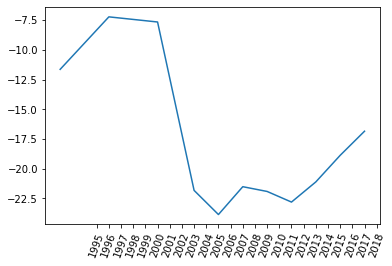

In [114]:
plt.plot(x,y)
plt.xticks(range(1995, 2019), rotation=70)
plt.show()

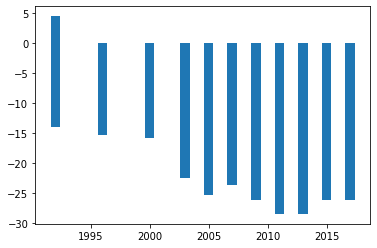

In [115]:
plt.bar(df.YEAR, df.FARK_4)
plt.show()

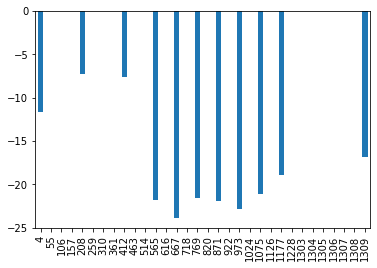

In [116]:
df[df.STATE == "CALIFORNIA"].FARK_4.plot.bar()

Text(0.5, 1.0, 'reading ve math farkı  (8)')

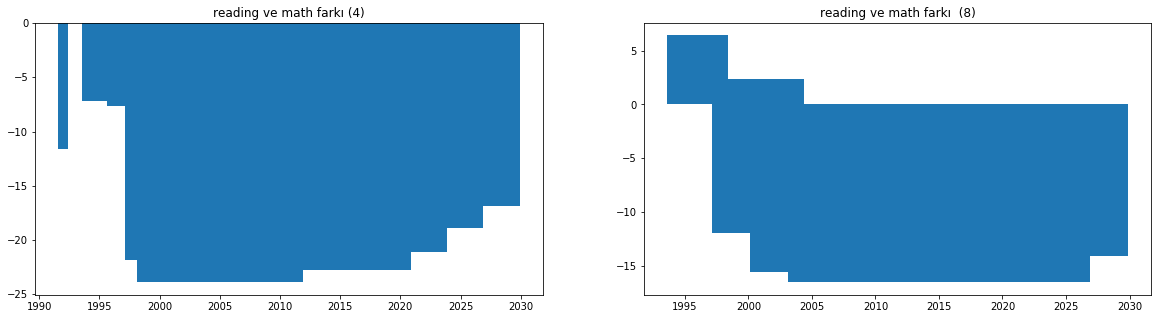

In [117]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.bar(x,y)

plt.title("reading ve math farkı (4)")

plt.subplot(1,2,2)
plt.bar(df.loc[df.STATE == "CALIFORNIA", "YEAR"],
         df.loc[df.STATE == "CALIFORNIA", "AVG_READING_8_SCORE"] - df.loc[df.STATE == "CALIFORNIA", "AVG_MATH_8_SCORE"])

plt.title("reading ve math farkı  (8)")

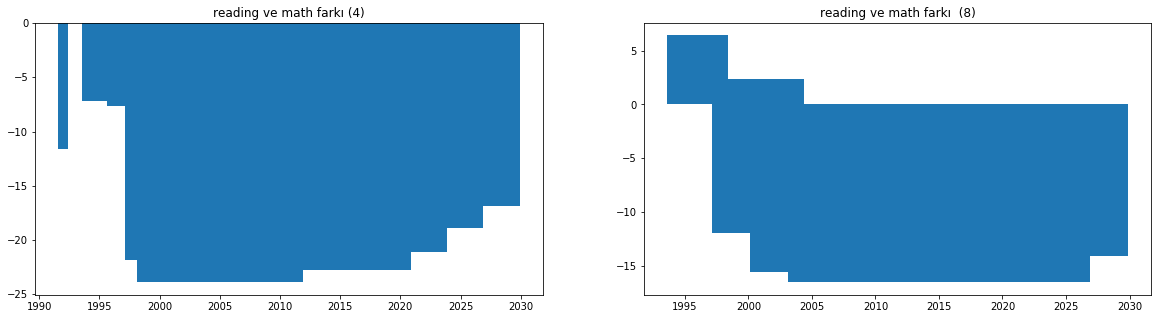

reading ve math farkı  (4)
4      -11.635
55         nan
106        nan
157        nan
208     -7.216
259        nan
310        nan
361        nan
412     -7.649
463        nan
514        nan
565    -21.823
616        nan
667    -23.855
718        nan
769    -21.512
820        nan
871    -21.913
922        nan
973    -22.806
1024       nan
1075   -21.108
1126       nan
1177   -18.871
1228       nan
1303       nan
1304       nan
1305       nan
1306       nan
1307       nan
1308       nan
1309   -16.841
dtype: float64
reading ve math farkı  (8)
4          nan
55         nan
106        nan
157        nan
208      6.425
259        nan
310        nan
361        nan
412      2.323
463        nan
514        nan
565    -11.976
616        nan
667     -4.374
718        nan
769     -2.222
820        nan
871    -15.553
922        nan
973    -11.485
1024       nan
1075   -15.453
1126       nan
1177   -16.556
1228       nan
1303       nan
1304       nan
1305       nan
1306       nan
1307       nan
1

In [118]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.bar(x,y)

plt.title("reading ve math farkı (4)")

plt.subplot(1,2,2)
plt.bar(df.loc[df.STATE == "CALIFORNIA", "YEAR"],
         df.loc[df.STATE == "CALIFORNIA", "AVG_READING_8_SCORE"] - df.loc[df.STATE == "CALIFORNIA", "AVG_MATH_8_SCORE"])

plt.title("reading ve math farkı  (8)")

plt.show()

print("reading ve math farkı  (4)")
print(df.loc[df.STATE == "CALIFORNIA", "AVG_READING_4_SCORE"] - df.loc[df.STATE == "CALIFORNIA", "AVG_MATH_4_SCORE"])
print("reading ve math farkı  (8)")
print(df.loc[df.STATE == "CALIFORNIA", "AVG_READING_8_SCORE"] - df.loc[df.STATE == "CALIFORNIA", "AVG_MATH_8_SCORE"])

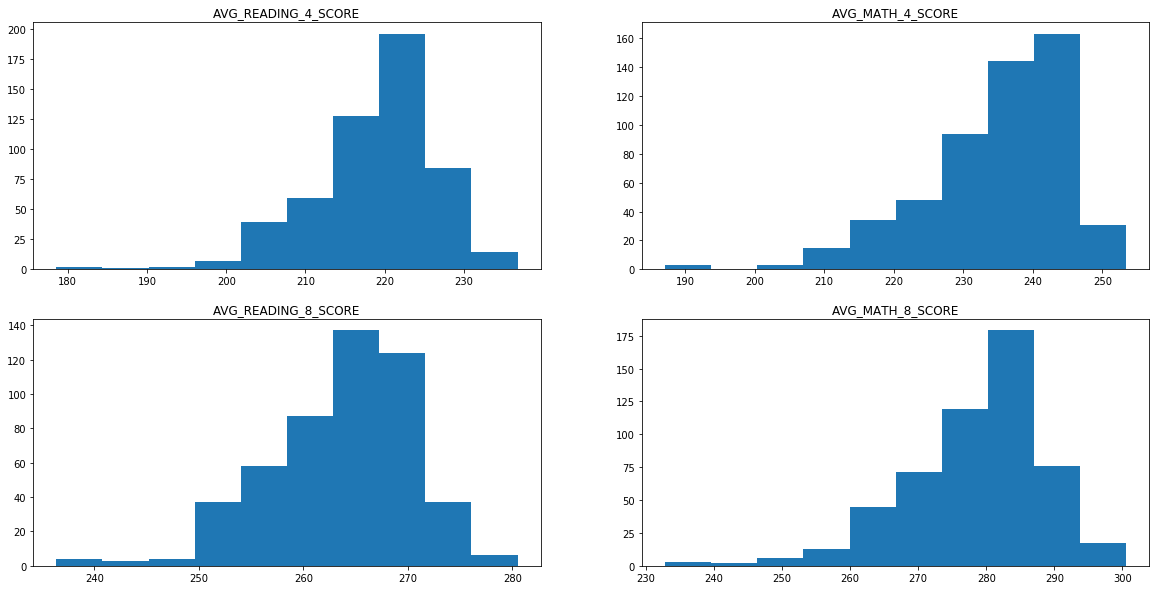

In [119]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(df.AVG_READING_4_SCORE.dropna())
plt.title("{}".format("AVG_READING_4_SCORE"))

plt.subplot(2,2,2)
plt.hist(df.AVG_MATH_4_SCORE.dropna())
plt.title("{}".format("AVG_MATH_4_SCORE"))

plt.subplot(2,2,3)
plt.hist(df.AVG_READING_8_SCORE.dropna())
plt.title("{}".format("AVG_READING_8_SCORE"))

plt.subplot(2,2,4)
plt.hist(df.AVG_MATH_8_SCORE.dropna())
plt.title("{}".format("AVG_MATH_8_SCORE"))
plt.show()

In [120]:
education_df = pd.read_csv('states_all_1.csv')
states = education_df["STATE"].unique()

In [121]:
orjinal_MATH_4 = education_df.AVG_MATH_4_SCORE.dropna()
interpolate_MATH_4 = education_df.AVG_MATH_4_SCORE.interpolate()
median_MATH_4 = education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.median())
mean_MATH_4 = education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.mean())

In [122]:
orjinal_READING_4 = education_df.AVG_READING_4_SCORE.dropna()
interpolate_READING_4 = education_df.AVG_READING_4_SCORE.interpolate()
median_READING_4 = education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.median())
mean_READING_4 = education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.mean())

In [123]:
orjinal_MATH_8 = education_df.AVG_MATH_8_SCORE.dropna()
interpolate_MATH_8 = education_df.AVG_MATH_8_SCORE.interpolate()
median_MATH_8 = education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.median())
mean_MATH_8 = education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.mean())

In [124]:
orjinal_READING_8 = education_df.AVG_READING_8_SCORE.dropna()
interpolate_READING_8 = education_df.AVG_READING_8_SCORE.interpolate()
median_READING_8 = education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.median())
mean_READING_8 = education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.mean())

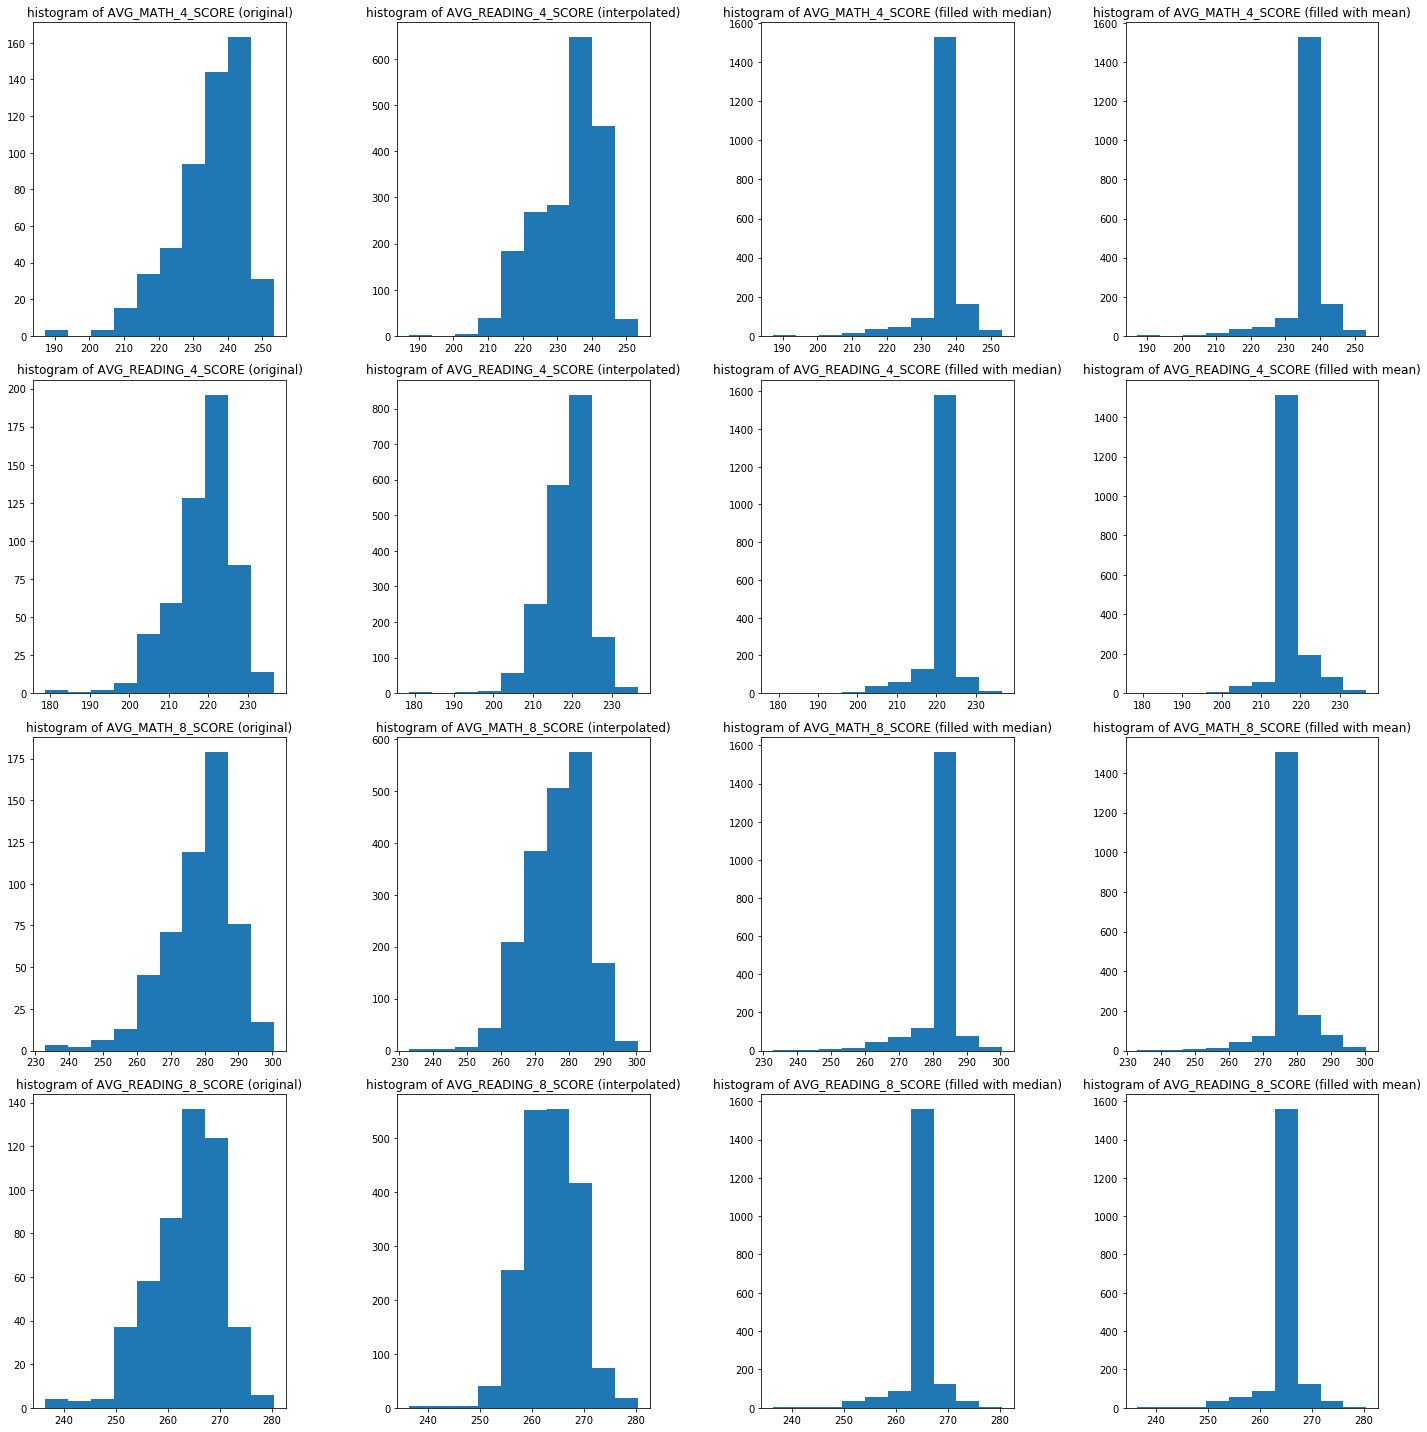

In [125]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(orjinal_MATH_4)
plt.title("histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(interpolate_MATH_4)
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(median_MATH_4)
plt.title("histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(mean_MATH_4)
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,5)
plt.hist(orjinal_READING_4)
plt.title("histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(interpolate_READING_4)
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(median_READING_4)
plt.title("histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(mean_READING_4)
plt.title("histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))


plt.subplot(4,4,9)
plt.hist(orjinal_MATH_8)
plt.title("histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(interpolate_MATH_8)
plt.title("histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(median_MATH_8)
plt.title("histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(mean_MATH_8)
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,13)
plt.hist(orjinal_READING_8)
plt.title("histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(interpolate_READING_8)
plt.title("histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(median_READING_8)
plt.title("histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(mean_READING_8)
plt.title("histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()